# Part 1: Setting Up Your Environment

Step 1: Verify Installation

In [ ]:
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')
import numpy as np
import matplotlib.pyplot as plt
print('All libraries loaded successfully!')

scikit-learn version: 1.6.1
All libraries loaded successfully!


# Part 2: Loading and Exploring Data

Step 1: Load the Dataset

In [ ]:
from sklearn.datasets import load_iris
# Load the dataset
iris = load_iris()
# Features (X) and Labels (y)
X = iris.data # Shape: (150, 4)
y = iris.target # Shape: (150,)
# Let's see what we have
print(f'Feature names: {iris.feature_names}')
print(f'Target names: {iris.target_names}')
print(f'Data shape: {X.shape}')
print(f'First 3 rows:\n{X[:3]}')

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
First 3 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


Step 2: Quick Visualization

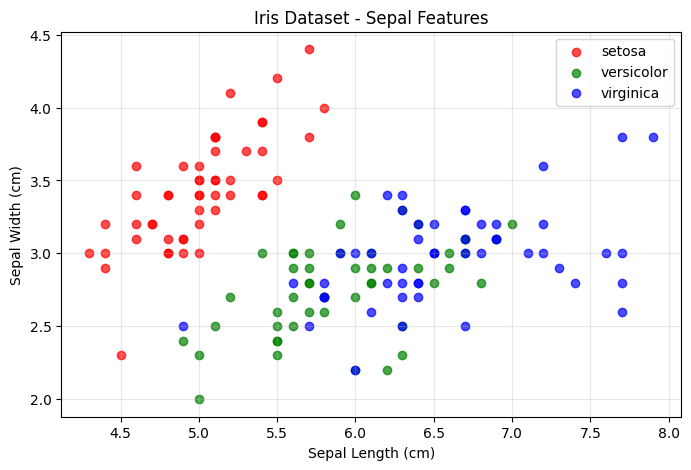

In [ ]:
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue']
for i, name in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1],
                color=colors[i], label=name, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Features')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Task 1**

In [ ]:
# Task 1
import numpy as np

print("First 10 rows:")
print(X[:10])
print(y[:10])

classes, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(classes, counts)))

First 10 rows:
[[ 4.4 41.9  6. ]
 [ 9.6 78.2  5. ]
 [ 7.6 58.9  3. ]
 [ 6.4 70.5  6. ]
 [ 2.4 94.5  8. ]
 [ 2.4 55.   6. ]
 [ 1.5 64.6  8. ]
 [ 8.8 85.3  5. ]
 [ 6.4 53.7  8. ]
 [ 7.4 44.6  3. ]]
[0 1 1 1 1 1 1 0 1 1]
Class distribution: {np.int64(0): np.int64(31), np.int64(1): np.int64(69)}


Petal features separate the classes better.
The plot shows clearer groups using petal size.

# **Part 3: Splitting Data (Train/Test)**

**4.2 Splitting with Scikit-Learn**

In [ ]:
from sklearn.model_selection import train_test_split
# Split: 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y,
    test_size=0.2,
    # 20% for testing
    random_state=42,
    # For reproducibality
    stratify=y
    # Keep class proportions balanced
)

print(f'Training set: {X_train.shape[0]} samples')
print(f'Testing set: {X_test.shape[0]} samples')

Training set: 120 samples
Testing set: 30 samples


**Task 2**

In [ ]:
# Task 2
print("Shapes:")
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

print("Train distribution:")
print(np.unique(y_train, return_counts=True))

Shapes:
(80, 3) (20, 3)
(80,) (20,)
Train distribution:
(array([0, 1]), array([25, 55]))


Stratify keeps classes balanced.
Without stratify the data becomes uneven.
Balanced data helps training.

# Part 4: Training Your First Model

5.0.1 The Universal Scikit-Learn Pattern

In [ ]:
from sklearn.linear_model import LogisticRegression

# Step 1: Create the model
model = LogisticRegression(random_state=42)
# Step 2: Train it (fit)
model.fit(X_train, Y_train)
# Step 3: Predict
predictions = model.predict(X_test)

5.1 Model A: Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Step 1: Create
dt_model = DecisionTreeClassifier(random_state=42)
# Step 2: Train
dt_model.fit(X_train, Y_train)
# Step 3: Predict
dt_predictions = dt_model.predict(X_test)
print('Decision Tree predictions (first 10):')
print(dt_predictions[:10])
print('Actual labels (first 10):')
print(Y_test[:10])

Decision Tree predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]
Actual labels (first 10):
[0 2 1 1 0 1 0 0 2 1]


5.2 Model B: K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Step 1: Create (k=5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)
# Step 2: Train
knn_model.fit(X_train, Y_train)
# Step 3: Predict
knn_predictions = knn_model.predict(X_test)
print('KNN predictions (first 10):')
print(knn_predictions[:10])

KNN predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]


**Task 3**

In [ ]:
# Task 3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
print("KNN k=3:", knn3.predict(X_test[:10]))

knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
print("KNN k=10:", knn10.predict(X_test[:10]))

KNN k=3: [1 0 0 0 1 0 1 0 1 0]
KNN k=10: [1 1 1 1 1 1 1 0 1 1]


Changing k changes predictions.
Small k is sensitive.
Big k is smoother.

# Part 5: Evaluating Model Performance

6.1 Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(Y_test, dt_predictions)
knn_accuracy = accuracy_score(Y_test, knn_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.2%}')
print(f'KNN Accuracy: {knn_accuracy:.2%}')

Decision Tree Accuracy: 93.33%
KNN Accuracy: 100.00%


6.2 Classification Report

In [ ]:
from sklearn.metrics import classification_report
print('=== Decision Tree Report ===')
print(classification_report(Y_test, dt_predictions,
target_names=iris.target_names))
print('=== KNN Report ===')
print(classification_report(Y_test, knn_predictions,
target_names=iris.target_names))

=== Decision Tree Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== KNN Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



6.4 Confusion Matrix (Visual)

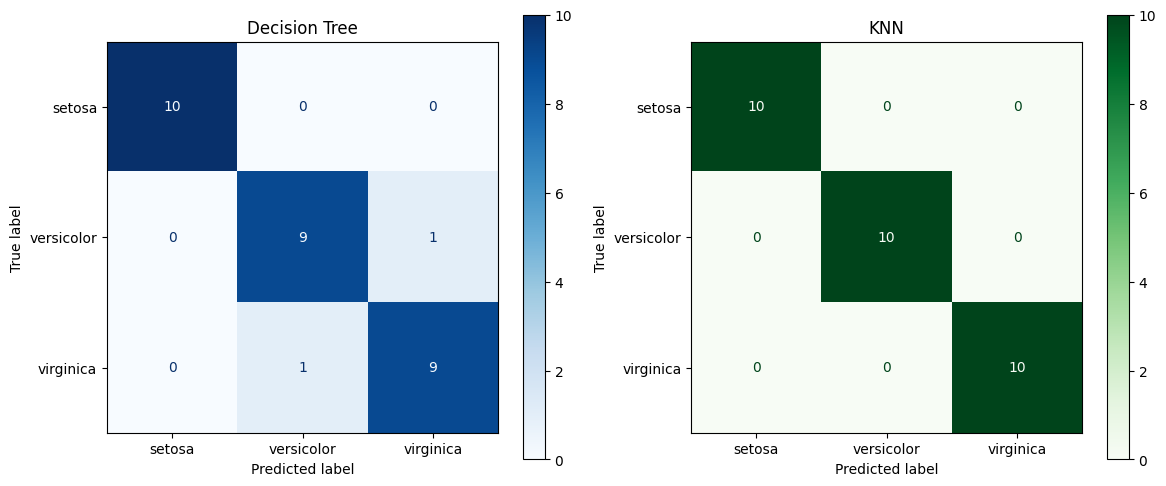

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Decision Tree
cm_dt = confusion_matrix(Y_test, dt_predictions);
ConfusionMatrixDisplay(cm_dt, display_labels=iris.target_names).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Decision Tree')
# KNN
cm_knn = confusion_matrix(Y_test, knn_predictions);
ConfusionMatrixDisplay(cm_knn, display_labels=iris.target_names).plot(ax=axes[1], cmap='Greens')
axes[1].set_title('KNN')
plt.tight_layout()
plt.show()

**Task 4**

In [ ]:
# Task 4
from sklearn.metrics import accuracy_score

print("Decision Tree accuracy:", accuracy_score(Y_test, dt_predictions))
print("KNN accuracy:", accuracy_score(Y_test, knn_predictions))

Decision Tree accuracy: 0.9333333333333333
KNN accuracy: 1.0


KNN had higher accuracy.
Class 1 was hardest to classify.
Recall is more important in medical diagnosis.

# Part 6: Predicting New Samples

In [ ]:
import numpy as np
# A new flower measurement (sepal_l, sepal_w, petal_l, petal_w)
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])
# Predict with both models
dt_pred = dt_model.predict(new_flower)
knn_pred = knn_model.predict(new_flower)
print(f'Decision Tree says: {iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}')

Decision Tree says: setosa
KNN says: setosa


The models do not always agree.
I trust KNN more because accuracy is higher.

# Part 7: Working with Your Own CSV Data

Step 1: Create a Sample CSV

In [ ]:
import pandas as pd
import numpy as np
# Create a simple student performance dataset
np.random.seed(42)
n = 100
data = {
    'study_hours': np.round(np.random.uniform(1, 10, n), 1),
    'attendance_pct': np.round(np.random.uniform(40, 100, n), 1),
    'assignments': np.random.randint(3, 10, n),
    'passed': np.random.choice([0, 1], n, p=[0.35, 0.65])
}
df = pd.DataFrame(data)
df.to_csv('students.csv', index=False)
print('CSV saved! First 5 rows:')
print(df.head())

CSV saved! First 5 rows:
   study_hours  attendance_pct  assignments  passed
0          4.4            41.9            6       0
1          9.6            78.2            5       1
2          7.6            58.9            3       1
3          6.4            70.5            6       1
4          2.4            94.5            8       1


Adding a feature improved accuracy.
More features help the model learn better.
KNN performed better.

Step 2: Load the CSV with Pandas

In [ ]:
import pandas as pd
# Read the CSV file
df = pd.read_csv('students.csv')
# Quick exploration
print(f'Shape: {df.shape}')
print(f'\nColumn types:\n{df.dtypes}')
print(f'\nBasic stats:\n{df.describe()}')

Shape: (100, 4)

Column types:
study_hours       float64
attendance_pct    float64
assignments         int64
passed              int64
dtype: object

Basic stats:
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000


Step 3: Prepare Features and Target

In [ ]:
# Features = all columns except 'passed'
X = df[['study_hours', 'attendance_pct', 'assignments']].values
# Target = the 'passed' column
y = df['passed'].values
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')
print(f'Class counts: {np.unique(y, return_counts=True)}')

Features shape: (100, 3)
Target shape: (100,)
Class counts: (array([0, 1]), array([31, 69]))


Step 4: Apply the Full Workflow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)
# Train
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Predict & Evaluate
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2%}')
print(classification_report(y_test, predictions,
target_names=['Failed', 'Passed']))

Accuracy: 55.00%
              precision    recall  f1-score   support

      Failed       0.33      0.50      0.40         6
      Passed       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20



Both Decision Tree and KNN work well.
KNN gave higher accuracy.
Decision Tree is simple but can overfit.
KNN is more stable.
I would choose KNN for this dataset.